In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage.util import random_noise


In [45]:
#img = cv2.imread("SunnyLake.bmp")

print("Dimensions of the image" + str(img.shape[0]))





print("Dimensions of the image" + str(G.shape))

plt.show(R)

#print(R[0:100, 0:100])


Dimensions of the image300
Dimensions of the image(300, 400)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Seperate Image into Different Channels

(<Figure size 720x720 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 <matplotlib.image.AxesImage at 0x7f9ad2dcb2e8>)

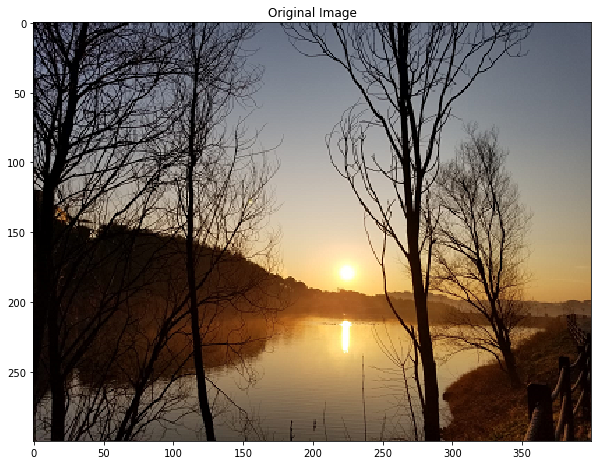

In [46]:
img = cv2.imread('SunnyLake.bmp')

R = img[:, : , 2]
G = img[:, : , 1]
B = img[:, :, 0]

plt.figure(figsize = (10, 10)) , plt.title("Original Image") , plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Display the Different Channel Images

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9ad2d635c0>,
 Text(0.5, 1.0, 'B  - Channel'),
 <matplotlib.image.AxesImage at 0x7f9ad2cacc88>)

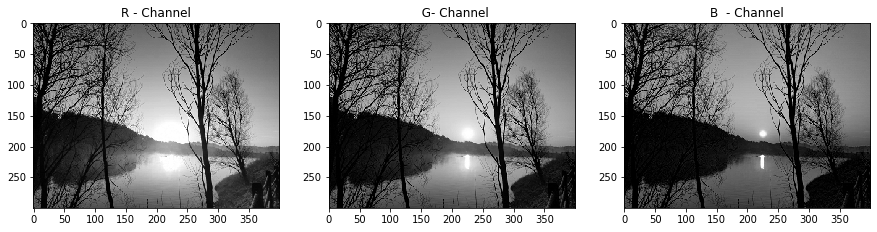

In [47]:
titles = ['R - Channel' ,'  G- Channel' , 'B  - Channel'];

f = plt.figure(); 
f.set_size_inches(15, 15) # Sets the size of the images to be displayed
f.add_subplot(1 , 3 , 1) , plt.title(titles[0]), plt.imshow(R , cmap = "gray")
f.add_subplot(1, 3 , 2),plt.title(titles[1]), plt.imshow(G , cmap = "gray") 
f.add_subplot(1, 3 , 3) , plt.title(titles[2]), plt.imshow(B , cmap = "gray") 


# Gray Scale Image Based on Average across all channels

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9ad2bf6ac8>)

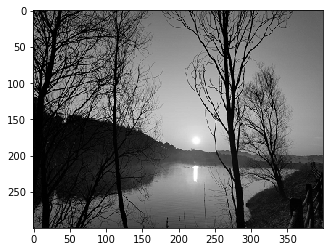

In [48]:
#gray scale method

def grayscale(img):
    
    R = img[:, : , 2]
    G = img[:, : , 1]
    B = img[:, :, 0]
    # compute the average across all channels
    gray = R / (np.average(R)) +  G / (np.average(G)) +  B / (np.average(B))

    # scale grayscale values
    gray = (gray * 255) / np.max(gray)

    #alternative method
    #I = np.average(img, -1)
    
    return gray

#convert image to grayscale
gray = grayscale(img);
#display gray image
plt.figure(), plt.imshow(gray , cmap = plt.get_cmap("gray"), interpolation = "nearest")



## Histogram from grayscale



(array([5.788e+03, 2.483e+03, 2.345e+03, 1.438e+03, 1.438e+03, 1.322e+03,
        1.240e+03, 1.175e+03, 1.154e+03, 1.175e+03, 1.084e+03, 1.018e+03,
        9.720e+02, 1.014e+03, 9.430e+02, 9.750e+02, 9.610e+02, 8.490e+02,
        8.280e+02, 7.980e+02, 8.040e+02, 7.160e+02, 7.350e+02, 6.690e+02,
        5.880e+02, 5.440e+02, 5.050e+02, 5.100e+02, 4.550e+02, 4.880e+02,
        4.180e+02, 4.330e+02, 4.590e+02, 4.690e+02, 4.380e+02, 4.710e+02,
        3.920e+02, 4.290e+02, 3.950e+02, 4.140e+02, 4.140e+02, 4.030e+02,
        4.290e+02, 4.330e+02, 3.910e+02, 3.910e+02, 4.480e+02, 3.740e+02,
        4.270e+02, 4.150e+02, 4.220e+02, 4.760e+02, 5.690e+02, 5.880e+02,
        5.330e+02, 5.490e+02, 5.260e+02, 5.330e+02, 5.500e+02, 5.840e+02,
        5.830e+02, 5.560e+02, 5.740e+02, 5.770e+02, 5.960e+02, 5.950e+02,
        5.880e+02, 5.830e+02, 5.680e+02, 5.630e+02, 6.560e+02, 6.660e+02,
        6.940e+02, 7.740e+02, 6.950e+02, 8.000e+02, 6.730e+02, 7.220e+02,
        6.910e+02, 7.120e+02, 7.160e+0

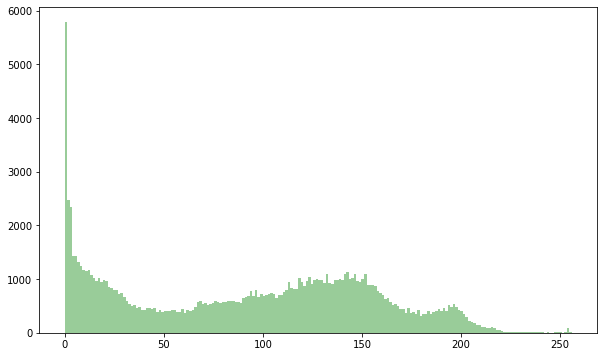

In [64]:
flat_img = gray.flatten()

plt.figure(figsize = (10 , 6))
plt.hist(flat_img, bins = 200 , range = (0, 256) , alpha= 0.4 , color = "g")

## Binary Image

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9ae1cb4668>,
 Text(0.5, 1.0, 'Binary Image'),
 <matplotlib.image.AxesImage at 0x7f9ad28ea400>)

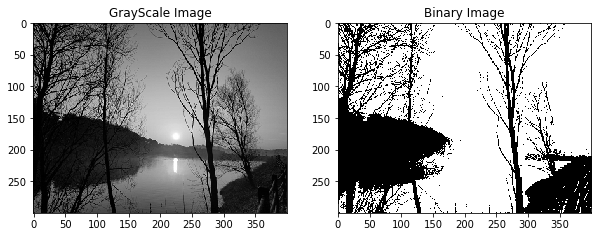

In [50]:

def threshold(image , T):

    #binary image.
    binary_image = (image > T) * 1 # set pixel values above threshold to 1
   
    return binary_image


#set threshold value
T = 50

#convert image to binary
binary_image = threshold(gray, T)

#display Thresholded image
f = plt.figure()
f.set_size_inches(10 , 10)
f.add_subplot(1 , 2 , 1) , plt.title('GrayScale Image'),  plt.imshow(gray  , cmap = 'gray')
f.add_subplot(1 , 2 , 2) , plt.title('Binary Image') , plt.imshow( binary_image, cmap = 'gray')
      

## Gaussian Noise Method

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9ad2899630>)

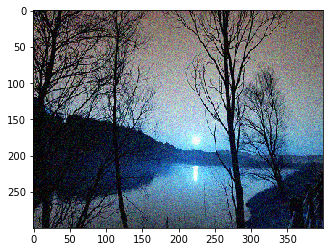

In [51]:
def gaussian_noise(mean, sigma, image):
    
    'Input: image of any dimensions'
    'Return a noisy image '
   
    #noisy_img = np.zeros(image.shape)
    if len(image.shape) == 2:

        row, col = image.shape

        mean = float(mean)
        sigma = float(sigma)


        gauss = np.random.normal(mean , sigma, (row, col)); #generate gaussian noise 

        gauss = np.reshape(gauss, (row, col));

        image = np.asarray(image , np.float64) # convert image to same format as gaussian array before addition else error

        ##add noise to image
        noisy_img = cv2.add(image , gauss)

        
    else:
        
        row, col , chan = image.shape

        mean = float(mean)
        sigma = float(sigma)

        gauss = np.random.normal(mean , sigma, (row, col , chan)); #generate gaussian noise 

        gauss = np.reshape(gauss, (row, col, chan));

        image = np.asarray(image , np.float64) # convert image to same format as gaussian array before addition else error

        ##add noise to image
        noisy_img = cv2.add(image , gauss)

    
    return noisy_img

#display original image with gaussian noise
gaus_img = gaussian_noise(0 , 1 , img);
gaus_img = np.asarray(gaussian_noise(  0 , 20, gaus_img) , np.int64)

plt.figure(), plt.imshow(gaus_img)


## Salt and Pepper Noise 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f9ad27ee780>)

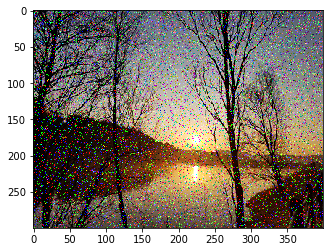

In [52]:
def saltPepper(img):
    
    # Add salt-and-pepper noise to the image.
    noise_img = random_noise(img, mode='s&p',amount=0.1)

    #convert from float to uint8
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    
    return noise_img

# display image

im = saltPepper(img)

plt.figure(), plt.imshow(cv2.cvtColor(im , cv2.COLOR_BGR2RGB))


## Add Noise to Different Channels

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9ad0e59518>,
 Text(0.5, 1.0, 'Noisy Blue Channel'),
 <matplotlib.image.AxesImage at 0x7f9ad0e24be0>)

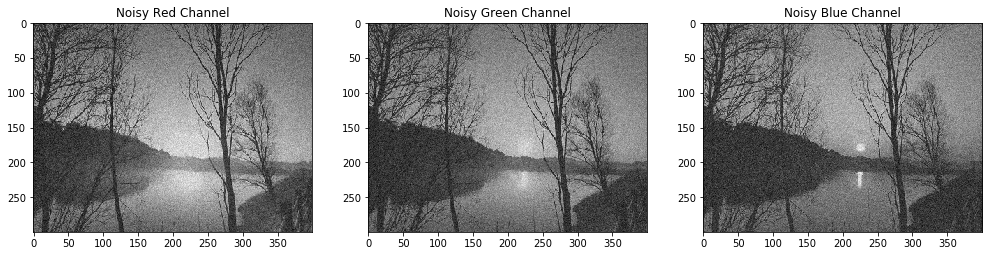

In [68]:


# add noise to R-channel 
R_noise = gaussian_noise(  0 , 20 , R)
# add noise to R-channel 
G_noise = gaussian_noise(  0 , 20 , G)
# add noise to R-channel 
B_noise = gaussian_noise(  0 , 20 , B)


f = plt.figure()
f.set_size_inches(17 , 17)

f.add_subplot(1 , 3 , 1) , plt.title('Noisy Red Channel'),  plt.imshow(R_noise  , cmap = 'gray')
f.add_subplot(1 , 3 , 2) , plt.title('Noisy Green Channel') , plt.imshow(G_noise , cmap = 'gray')
f.add_subplot(1 , 3 , 3) , plt.title('Noisy Blue Channel') , plt.imshow(B_noise , cmap = 'gray')
 

#cv2.imshow("moise" , R_noise)
#cv2.waitKey(0)
#cv2.destroyAllWindows() 

#plt.figure() , plt.imshow(R_noise , cmap = "gray")

## Average Gray Scale Image For Different Gaussian Noises

In [71]:
#list of std_deviation values for gaussian noise
sigma_list = [1,5,10,20]

gray_noise_list = []

for sigma in  sigma_list:   
    # add noise to R-channel 
    R_noise = gaussian_noise(  0 , sigma , R)
    # add noise to R-channel 
    G_noise = gaussian_noise(  0 , sigma , G)
    # add noise to R-channel 
    B_noise = gaussian_noise(  0 , sigma, B)
    
    # compute the average across all channels
    gray_noise = R / (np.average(R)) +  G / (np.average(G)) +  B / (np.average(B))

    # scale values
    gray_noise = (gray * 255) / np.max(gray)
    
    #append all average gray scale noisy images to list
    gray_noise_list.append(gray_noise)
    

    
    
    

In [72]:
k = gray_noise_list[0]
print(np.max(k))

255.0


## Display all the Averaged Gray scale Noisy Images

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9acbfef588>,
 Text(0.5, 1.0, 'Standard Deviation = 20'),
 <matplotlib.image.AxesImage at 0x7f9acbf48128>)

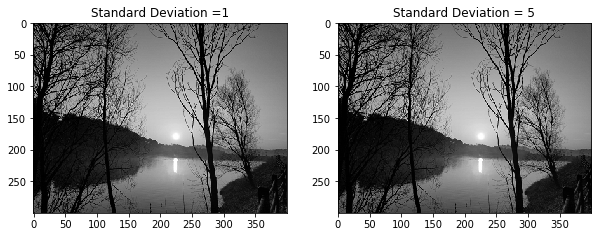

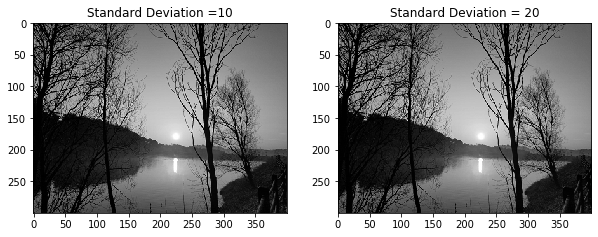

In [82]:
f = plt.figure()
f.set_size_inches(10, 10)
f.add_subplot(1,2, 1) , plt.title("Standard Deviation =" + str(sigma_list[0])), plt.imshow(gray_noise_list[0], cmap = "gray")
f.add_subplot(1,2, 2) , plt.title("Standard Deviation = " + str(sigma_list[1])), plt.imshow(gray_noise_list[1], cmap = "gray")

f1 = plt.figure()
f1.set_size_inches(10, 10)
f1.add_subplot(1,2, 1) , plt.title("Standard Deviation =" + str(sigma_list[2])), plt.imshow(gray_noise_list[2], cmap= "gray")
f1.add_subplot(1,2, 2) , plt.title("Standard Deviation = " + str(sigma_list[3])), plt.imshow(gray_noise_list[3], cmap ="gray")


## Comments on Figure 1

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salt and Pepper Noise'),
 <matplotlib.image.AxesImage at 0x7f9acbe4e080>)

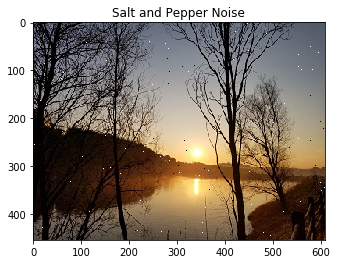

In [86]:
noise_img = cv2.imread("Figure_1.png")

plt.figure(), plt.title("Salt and Pepper Noise"), plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))

## De-noising Image with Median Filter

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'De-Noise Image'),
 <matplotlib.image.AxesImage at 0x7f9acbd66128>)

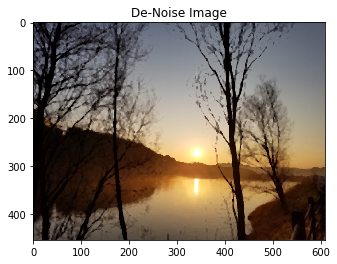

In [90]:
#median Filtering
filtered_img = cv2.medianBlur(noise_img, 5)

plt.figure(), plt.title("De-Noise Image"), plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))